<a href="https://colab.research.google.com/github/RomanenkoRIS/ML-NeuralNetworksStudying/blob/main/HT10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tqdm==4.38

In [ ]:
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

In [ ]:
import torch
import time
import torchvision
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.utils.data as data_utils
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn
from torch.nn import functional as torch_F
 
 
 
from time import sleep
from tqdm import tqdm_notebook as tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print('GPU')
else:
  device = torch.device("cpu")
  print("CPU")

GPU


In [ ]:
ValPath = 'drive/MyDrive/ColabNotebooks/test'
TrainPath = 'drive/MyDrive/ColabNotebooks/train'
 
 
transform = transforms.Compose([transforms.RandomCrop(224),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])
 
dataset = datasets.ImageFolder(root=TrainPath, transform=transform,) 
 
train_data, val_data = torch.utils.data.random_split(dataset, [int(0.9* len(dataset)),int(0.1* len(dataset))])
 
 
loader_train = DataLoader(train_data,
                    shuffle=True,
                    batch_size=128, 
                    num_workers=2)
 
loader_val = DataLoader(val_data, num_workers = 2)

In [ ]:
dataset.class_to_idx

{'AiPhone-6': 0,
 'HTC-1-M7': 1,
 'LG-Nexus-5x': 2,
 'Motorola-Droid-Maxx': 3,
 'Motorola-Nexus-6': 4,
 'Motorola-X': 5,
 'Samsung-Galaxy-Note3': 6,
 'Samsung-Galaxy-S4': 7,
 'Sony-NEX-7': 8,
 'iPhone-4s': 9}

In [ ]:
for i in range(0,1):
    examples = enumerate(loader_val)
    batch_idx, (example_data, example_targets2) = next(examples) 
    # plt.figure()
    # im = torchvision.utils.make_grid(example_data)
    # plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
    print(example_targets2)

tensor([2])


In [ ]:
MobilenetV2 = torch.hub.load('pytorch/vision', 'mobilenet_v2', pretrained=True)
MobilenetV2.classifier = nn.Linear(MobilenetV2.last_channel, 10, bias=True)
# MobilenetV2

Using cache found in /root/.cache/torch/hub/pytorch_vision_master


In [ ]:
v2 = MobilenetV2.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([
                              {"params":v2.classifier.parameters()},
                              {"params":v2.features.parameters(), "lr":1e-3}
                              ], 
                             lr=1e-2)
 
# exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1,verbose=True)

scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.5)
 
train_losses = []
val_losses = []
valid_accuracies = []
 
for epoch in range(30):
 
    v2.train()
    print(epoch+1)
    loss_sum_tr = 0
    for data, target in tqdm(loader_train,desc='train'):
        sleep(0.1)
        data = data.to(device)
        target = target.to(device)
        
        output = v2(data)
        loss = criterion(output, target)
        loss_sum_tr += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    train_losses.append(loss_sum_tr / len(loader_train))

    scheduler.step() 
 
    
    loss_sum_val = 0
    correct = 0
    num = 0
 
    v2.eval()
    with torch.no_grad():
        for data_ts, target_ts in tqdm(loader_val,desc='valid'):
            sleep(0.2)
            data_ts = data_ts.to(device)
            target_ts = target_ts.to(device)
            probs = v2(data_ts)
            loss_sum_val += criterion(probs, target_ts).item()
 
 
            _, preds_val = torch.max(probs , axis =-1)
            correct += (preds_val == target_ts).sum().item()
            num += len(data_ts)
 
        val_losses.append(loss_sum_val / len(loader_val))
        valid_accuracies.append(correct / num)
 
        
      
    print(f'epoch:{int(epoch+1)}\
    \t train loss:{round(loss_sum_tr / len(loader_train),4)}\
    \t valid loss:{round(loss_sum_val/len(loader_val),4)}\
    \t valid accuracies:({correct} / {num}) {round((correct / num)*100,2)}')

1


epoch:1    	 train loss:0.8646    	 valid loss:0.6621    	 valid accuracies:(208 / 275) 75.64
2


epoch:2    	 train loss:0.5267    	 valid loss:0.4907    	 valid accuracies:(231 / 275) 84.0
3


epoch:3    	 train loss:0.3788    	 valid loss:0.3139    	 valid accuracies:(247 / 275) 89.82
4


epoch:4    	 train loss:0.2935    	 valid loss:0.3113    	 valid accuracies:(246 / 275) 89.45
5


epoch:5    	 train loss:0.2508    	 valid loss:0.2056    	 valid accuracies:(255 / 275) 92.73
6


epoch:6    	 train loss:0.23    	 valid loss:0.2014    	 valid accuracies:(259 / 275) 94.18
7


epoch:7    	 train loss:0.2102    	 valid loss:0.2294    	 valid accuracies:(257 / 275) 93.45
8


epoch:8    	 train loss:0.2262    	 valid loss:0.2058    	 valid accuracies:(255 / 275) 92.73
9


epoch:9    	 train loss:0.2267    	 valid loss:0.2174    	 valid accuracies:(253 / 275) 92.0
10


epoch:10    	 train loss:0.2144    	 valid loss:0.2092    	 valid accuracies:(253 / 275) 92.0
11


epoch:11    	 train loss:0.2061    	 valid loss:0.2632    	 valid accuracies:(252 / 275) 91.64
12


epoch:12    	 train loss:0.1982    	 valid loss:0.2272    	 valid accuracies:(255 / 275) 92.73
13


epoch:13    	 train loss:0.1858    	 valid loss:0.2677    	 valid accuracies:(252 / 275) 91.64
14


epoch:14    	 train loss:0.2028    	 valid loss:0.2427    	 valid accuracies:(251 / 275) 91.27
15


epoch:15    	 train loss:0.2128    	 valid loss:0.2465    	 valid accuracies:(250 / 275) 90.91
16


epoch:16    	 train loss:0.1849    	 valid loss:0.1558    	 valid accuracies:(259 / 275) 94.18
17


epoch:17    	 train loss:0.2077    	 valid loss:0.1555    	 valid accuracies:(259 / 275) 94.18
18


epoch:18    	 train loss:0.2033    	 valid loss:0.2381    	 valid accuracies:(250 / 275) 90.91
19


epoch:19    	 train loss:0.195    	 valid loss:0.206    	 valid accuracies:(249 / 275) 90.55
20


epoch:20    	 train loss:0.196    	 valid loss:0.1962    	 valid accuracies:(258 / 275) 93.82
21


epoch:21    	 train loss:0.204    	 valid loss:0.2444    	 valid accuracies:(253 / 275) 92.0
22


epoch:22    	 train loss:0.2086    	 valid loss:0.2083    	 valid accuracies:(258 / 275) 93.82
23


epoch:23    	 train loss:0.204    	 valid loss:0.1837    	 valid accuracies:(258 / 275) 93.82
24


epoch:24    	 train loss:0.1976    	 valid loss:0.2086    	 valid accuracies:(251 / 275) 91.27
25


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5167d2f320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5167d2f320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

epoch:25    	 train loss:0.2226    	 valid loss:0.1929    	 valid accuracies:(255 / 275) 92.73
26


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5167d2f320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5167d2f320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

epoch:26    	 train loss:0.4368    	 valid loss:0.2221    	 valid accuracies:(253 / 275) 92.0
27


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5167d2f320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


epoch:27    	 train loss:0.2359    	 valid loss:0.2135    	 valid accuracies:(254 / 275) 92.36
28


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5167d2f320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5167d2f320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

epoch:28    	 train loss:0.1986    	 valid loss:0.1928    	 valid accuracies:(257 / 275) 93.45
29


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5167d2f320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5167d2f320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

epoch:29    	 train loss:0.2342    	 valid loss:0.2459    	 valid accuracies:(250 / 275) 90.91
30


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5167d2f320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5167d2f320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

epoch:30    	 train loss:0.2012    	 valid loss:0.267    	 valid accuracies:(251 / 275) 91.27


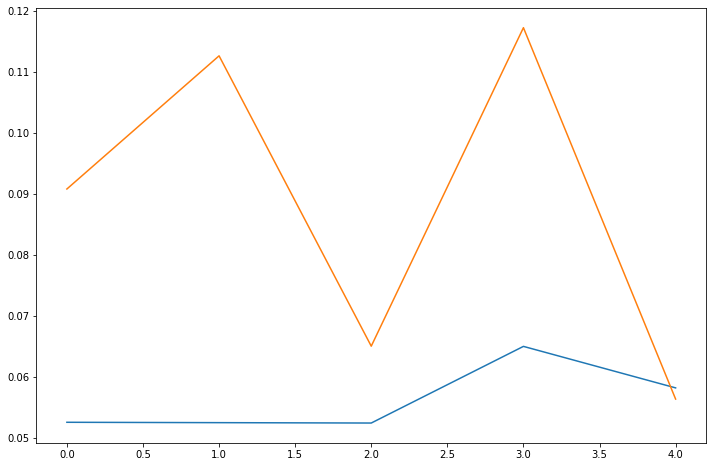

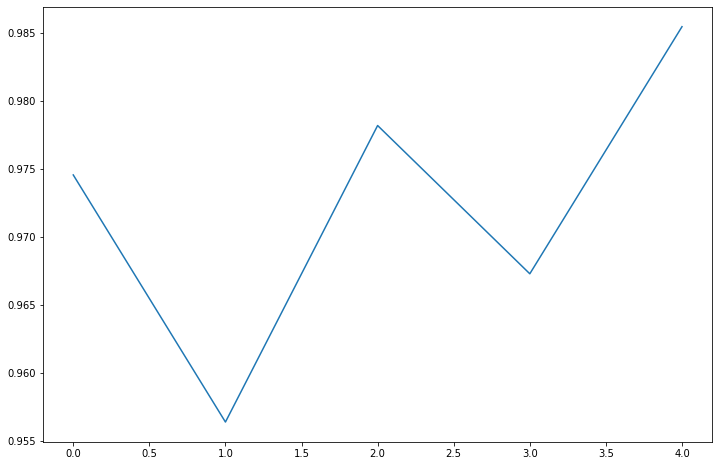

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(train_losses)
plt.plot(val_losses)
plt.show()

plt.figure(figsize=[12,8])
plt.plot(valid_accuracies)
plt.show()

In [ ]:
 _, preds = torch.max(torch.nn.functional.softmax(output, dim=0), axis =-1)
 
 preds

tensor([0, 0, 2, 6, 8, 0, 3, 5, 6, 6, 2, 4, 5, 5, 8, 4, 2, 0, 0, 5, 0, 8, 6, 2,
        0, 7, 7, 9, 0, 2, 2, 5, 7, 5, 0, 7, 0, 6, 2, 1, 0, 7, 2],
       device='cuda:0')

In [ ]:
target

tensor([4, 9, 5, 6, 8, 9, 3, 5, 6, 6, 3, 4, 5, 5, 8, 4, 2, 9, 9, 5, 0, 8, 6, 2,
        7, 7, 7, 9, 9, 6, 1, 5, 7, 5, 0, 7, 4, 4, 2, 1, 4, 7, 2],
       device='cuda:0')

In [ ]:
loss_sum_val = 0
correct = 0
num = 0

v2.eval()
with torch.no_grad():
    for data_ts, target_ts in tqdm(loader_val,desc='valid'):
        sleep(0.2)
        data_ts = data_ts.to(device)
        target_ts = target_ts.to(device)
        probs = v2(data_ts)
        _, preds_val = torch.max(torch.nn.functional.sigmoid(probs ), axis =-1)
        cor = (preds_val == target_ts).sum().item()
        correct += cor
        # print(torch.nn.functional.sigmoid(v2(data_ts)))
        print(preds_val.item(),'/',target_ts.item(),'/',(cor/len(target_ts))) #'/',(cor/len(target_ts))

4 / 4 / 1.0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


6 / 6 / 1.0
9 / 9 / 1.0
0 / 0 / 1.0
5 / 5 / 1.0
5 / 5 / 1.0
5 / 5 / 1.0
4 / 4 / 1.0
6 / 6 / 1.0
9 / 9 / 1.0
0 / 0 / 1.0
3 / 3 / 1.0
9 / 9 / 1.0
1 / 1 / 1.0
6 / 6 / 1.0
5 / 2 / 0.0
4 / 4 / 1.0
3 / 3 / 1.0
9 / 9 / 1.0
2 / 2 / 1.0
7 / 7 / 1.0
6 / 6 / 1.0
4 / 3 / 0.0
8 / 8 / 1.0
2 / 2 / 1.0
3 / 3 / 1.0
8 / 8 / 1.0
5 / 6 / 0.0
4 / 4 / 1.0
8 / 8 / 1.0
5 / 5 / 1.0
0 / 0 / 1.0
2 / 2 / 1.0
3 / 3 / 1.0
0 / 0 / 1.0
8 / 8 / 1.0
9 / 9 / 1.0
6 / 6 / 1.0
5 / 5 / 1.0
7 / 7 / 1.0
1 / 1 / 1.0
9 / 9 / 1.0
1 / 1 / 1.0
2 / 2 / 1.0
2 / 2 / 1.0
6 / 6 / 1.0
8 / 8 / 1.0
9 / 9 / 1.0
6 / 6 / 1.0
4 / 4 / 1.0
2 / 2 / 1.0
3 / 3 / 1.0
0 / 0 / 1.0
2 / 2 / 1.0
0 / 0 / 1.0
3 / 3 / 1.0
8 / 8 / 1.0
0 / 0 / 1.0
2 / 2 / 1.0
3 / 3 / 1.0
9 / 9 / 1.0
7 / 7 / 1.0
2 / 2 / 1.0
7 / 7 / 1.0
2 / 2 / 1.0
4 / 4 / 1.0
1 / 1 / 1.0
8 / 8 / 1.0
1 / 1 / 1.0
3 / 3 / 1.0
9 / 9 / 1.0
9 / 9 / 1.0
4 / 4 / 1.0
7 / 7 / 1.0
5 / 5 / 1.0
0 / 0 / 1.0
8 / 8 / 1.0
2 / 2 / 1.0
4 / 4 / 1.0
3 / 3 / 1.0
9 / 9 / 1.0
6 / 6 / 1.0
9 / 9 / 1.0
0 / 0 / 1.0
3 / 

In [ ]:
correct/275

0.9745454545454545